# K-Nearest Neighbors (KNN) — Regression + Classification (Grades → Salary)
This notebook builds a tiny dataset first (5 samples) to **learn the KNN steps by hand**, then scales the same idea to a **100-sample dataset**.

**Features (inputs)**: `grade`, `backlogs_cleared`

**Targets (outputs)**:
- Regression: `salary_lpa` (numeric)
- Classification: `high_package` (0/1)

> Rule of thumb: KNN predicts based on the **closest** examples in the training data using a **distance metric**.

## 1) Imports (kept minimal)

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4) # (h,w)

## 2) A tiny 5-sample dataset
We create a small dataset so you can see every distance and neighbor clearly.

In [3]:
df = pd.DataFrame({'grade':[65,72,80,90,85],
                   'backlogs_cleared':[1,0,2,3,1],
                   'salary_lpa':[6.0,6.5,7.5,10.0,8.8]
                  })
df # df - dataframe - Create a dataset - Use Pandas.
#data = n.array()

,grade,backlogs_cleared,salary_lpa
0,65,1,6.0
1,72,0,6.5
2,80,2,7.5
3,90,3,10.0
4,85,1,8.8


### Convert to arrays (X = features, y = target)
KNN works on numeric feature vectors.

In [5]:
X = df[['grade','backlogs_cleared']].to_numpy()
y = df['salary_lpa'].to_numpy()
# Avoid this when working with Functions
X

array([[65,  1],
       [72,  0],
       [80,  2],
       [90,  3],
       [85,  1]], dtype=int64)

In [6]:
y

array([ 6. ,  6.5,  7.5, 10. ,  8.8])

## 3) Choose a new student (query point)
We will predict the salary package for this student using KNN.

In [7]:
x0 = np.array([78,2])
x0

array([78,  2])

## 4) KNN Regression — Manual Euclidean steps
### Step 1: Compute Euclidean distance to every training point
\[
 d(x, x_i)=\sqrt{\sum_j (x_j-x_{ij})^2}
\]

In [8]:
d = np.sqrt(((X - x0)**2).sum(axis=1))
pd.Series(d, index=df.index, name='euclidian distance')

0    13.038405
1     6.324555
2     2.000000
3    12.041595
4     7.071068
Name: euclidian distance, dtype: float64

### Step 2: Pick K nearest neighbors
We’ll use **K = 3** (a common small value for learning).

In [6]:
k = 3 # Industry Standard - may be 3 chances
nn = np.argsort(d)[:k] # decending order - bottom to top
nn

array([2, 1, 4], dtype=int64)

### Step 3: Predict (Regression)
KNN regression prediction is the **mean salary** of the K nearest neighbors.

In [7]:
# Extract the packages in y selected by k index
y_hat = y[nn].mean() # Average
y_hat # Predicted Value

7.6000000000000005

## 5) Visualize: points, query, and chosen neighbors
- Axes: **(grade, backlogs_cleared)**
- Point color: salary (continuous)
- Neighbors highlighted with a different marker

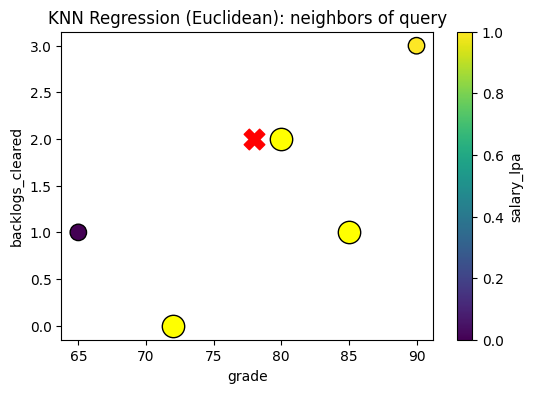

In [27]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=140,edgecolor='k'); 
plt.scatter(*x0,c='red',s=220,marker='X'); 
plt.scatter(X[nn,0],X[nn,1],c='yellow',s=260,marker='o',edgecolor='k')
plt.xlabel('grade'); plt.ylabel('backlogs_cleared'); 
plt.title('KNN Regression (Euclidean): neighbors of query')
plt.colorbar(label='salary_lpa'); plt.show()

### Same plot with a different color combination
Changing the colormap helps you see the same geometry with different color emphasis.

## 6) KNN Regression using scikit-learn (Euclidean)
This matches the same idea, but uses a tested implementation.

In [10]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knnr.fit(X,y); knnr.predict([x0])
# What is the training algorithm in KNN? - No Training.

array([7.6])

## 7) Visualize KNN regression surface (Euclidean)
We predict on a grid and draw a smooth heatmap to show **local averaging**.

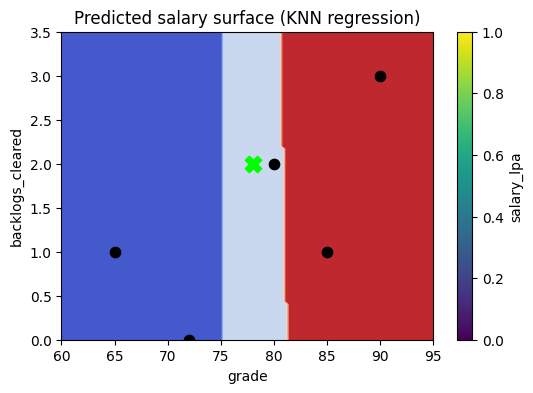

In [11]:
gx,gy=np.meshgrid(np.linspace(60,95,120),np.linspace(0,3.5,120)); grid=np.c_[gx.ravel(),gy.ravel()]
z=knnr.predict(grid).reshape(gx.shape); plt.contourf(gx,gy,z,levels=18,cmap='coolwarm'); plt.scatter(X[:,0],X[:,1],c='black',s=55)
plt.scatter(*x0,c='lime',s=140,marker='X'); plt.xlabel('grade'); plt.ylabel('backlogs_cleared'); plt.title('Predicted salary surface (KNN regression)'); plt.colorbar(label='salary_lpa'); plt.show()

## 8) Same dataset → KNN Classification
We turn salary into a class label: **high_package = 1** if salary ≥ 8.0 LPA, else 0.

In [12]:
df['high_package'] = (df['salary_lpa']>=8.0).astype(int)
df[['grade','backlogs_cleared','salary_lpa','high_package']]
# Classifier has output in the form of 0 and 1 or in between 0 and 1

,grade,backlogs_cleared,salary_lpa,high_package
0,65,1,6.0,0
1,72,0,6.5,0
2,80,2,7.5,0
3,90,3,10.0,1
4,85,1,8.8,1


### Fit a KNN classifier (Euclidean)
Prediction is by **majority vote** of neighbor labels.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
y_cls = df['high_package'].to_numpy()
knnc = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(X,y_cls)

### Predict class for the same query point

In [14]:
knnc.predict([x0])
knnc.predict_proba([x0])

array([[0.66666667, 0.33333333]])

## 9) Visualize KNN classification boundary (Euclidean)
Color = predicted class on a grid; points show the training labels.

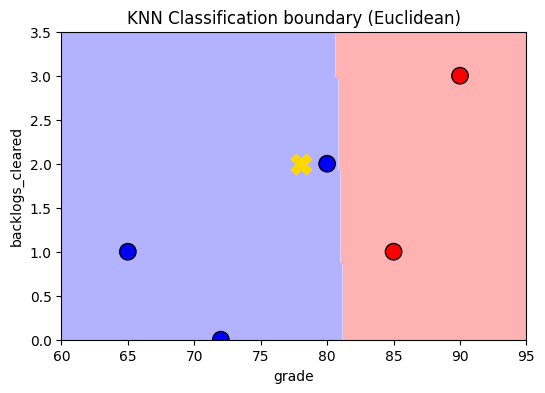

In [15]:
gx,gy=np.meshgrid(np.linspace(60,95,200),np.linspace(0,3.5,200)); grid=np.c_[gx.ravel(),gy.ravel()]
zz=knnc.predict(grid).reshape(gx.shape)
plt.contourf(gx,gy,zz,levels=2,alpha=0.45,cmap='bwr'); plt.scatter(X[:,0],X[:,1],c=y_cls,cmap='bwr',s=140,edgecolor='k'); plt.scatter(*x0,c='gold',s=220,marker='X'); plt.xlabel('grade'); plt.ylabel('backlogs_cleared'); plt.title('KNN Classification boundary (Euclidean)'); plt.show()

## 10) Try other distance metrics
Common KNN metrics you’ll see:
- **manhattan** (L1)
- **chebyshev** (L∞)
- **cosine** (angle-based)

We compare how the *same* query prediction changes with the metric.

In [16]:
metrics = ['euclidean','manhattan','chebyshev','cosine']
reg_preds = {m: KNeighborsRegressor(n_neighbors=3, metric=m).fit(X,y).predict([x0])[0] for m in metrics}
reg_preds
# Task - Implement KNN for 100 samples of data

{'euclidean': 7.6000000000000005,
 'manhattan': 7.6000000000000005,
 'chebyshev': 7.6000000000000005,
 'cosine': 7.833333333333333}

### Classification predictions with different metrics (same dataset)

In [17]:
cls_preds = {m: KNeighborsClassifier(n_neighbors=3, metric=m).fit(X,y_cls).predict([x0])[0] for m in metrics}
cls_preds

{'euclidean': 0, 'manhattan': 0, 'chebyshev': 0, 'cosine': 0}

## 11) Extend to a 100-sample dataset (created here)
We generate a realistic synthetic dataset:
- grades: 50–95
- backlogs cleared: 0–5
- salary is correlated with both + some noise

This keeps the learning contained in one file.

In [18]:
rng = np.random.default_rng(7)
grades = rng.integers(50,96,100); cleared = rng.integers(0,6,100)
salary = 1.5 + 0.095*grades + 0.55*cleared + rng.normal(0,0.6,100)

### Build the dataframe and label for classification

In [19]:
df100 = pd.DataFrame({'grade':grades,'backlogs_cleared':cleared,'salary_lpa':salary})
df100['high_package'] = (df100['salary_lpa']>=8.0).astype(int)
df100.head()

,grade,backlogs_cleared,salary_lpa,high_package
0,93,4,11.313803,1
1,78,2,9.827314,1
2,81,3,10.305043,1
3,91,3,11.893432,1
4,76,0,10.066854,1


### Train a KNN regressor (Euclidean) on 100 samples
We’ll split train/test so you see a typical workflow.

In [20]:
from sklearn.model_selection import train_test_split
X100=df100[['grade','backlogs_cleared']].to_numpy(); y100=df100['salary_lpa'].to_numpy()
Xtr,Xte,ytr,yte=train_test_split(X100,y100,test_size=0.25,random_state=0)

### Fit + evaluate regression quickly (R² score)

In [21]:
knnr100 = KNeighborsRegressor(n_neighbors=7, metric='euclidean').fit(Xtr,ytr)
(knnr100.score(Xte,yte), knnr100.predict([x0])[0])

(0.8530281171532668, 10.59646695480612)

### Plot: salary as color (100 samples)
This shows the **data geometry** KNN uses.

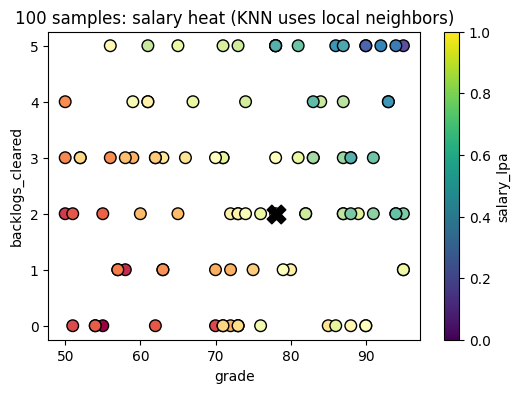

In [22]:
plt.scatter(X100[:,0],X100[:,1],c=y100,cmap='Spectral',s=70,edgecolor='k'); plt.scatter(*x0,c='black',s=180,marker='X')
plt.xlabel('grade'); plt.ylabel('backlogs_cleared'); plt.title('100 samples: salary heat (KNN uses local neighbors)')
plt.colorbar(label='salary_lpa'); plt.show()

### KNN classifier on 100 samples (Euclidean)
Now we classify high/low package with a KNN classifier.

In [23]:
y100c=df100['high_package'].to_numpy(); Xtr,Xte,ytr,yte=train_test_split(X100,y100c,test_size=0.25,random_state=0)
knnc100 = KNeighborsClassifier(n_neighbors=9, metric='euclidean').fit(Xtr,ytr)
(knnc100.score(Xte,yte), knnc100.predict([x0])[0])

(0.96, 1)

### Classification boundary on 100 samples
This shows how KNN forms **nonlinear** regions based on nearby labels.

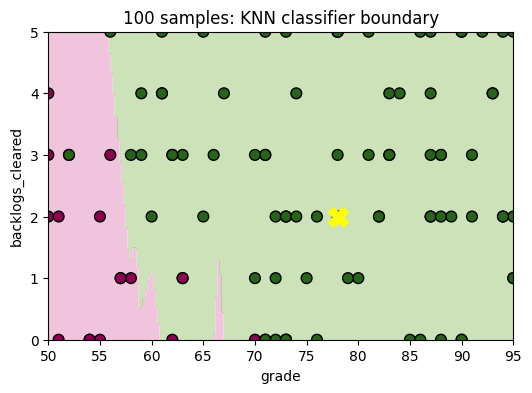

In [24]:
gx,gy=np.meshgrid(np.linspace(50,95,220),np.linspace(0,5,220)); grid=np.c_[gx.ravel(),gy.ravel()]
zz=knnc100.predict(grid).reshape(gx.shape)
plt.contourf(gx,gy,zz,levels=2,alpha=0.35,cmap='PiYG'); plt.scatter(X100[:,0],X100[:,1],c=y100c,cmap='PiYG',s=60,edgecolor='k'); plt.scatter(*x0,c='yellow',s=200,marker='X'); plt.xlabel('grade'); plt.ylabel('backlogs_cleared'); plt.title('100 samples: KNN classifier boundary'); plt.show()

## 12) Metric comparison on the 100-sample dataset
Same K, different metrics → different neighbor sets → different performance.

In [25]:
metrics=['euclidean','manhattan','chebyshev','cosine']
reg_scores={m:KNeighborsRegressor(n_neighbors=7,metric=m).fit(Xtr,ytr.astype(float)).score(Xte,yte.astype(float)) for m in metrics}
reg_scores

{'euclidean': 0.6020408163265305,
 'manhattan': 0.6224489795918366,
 'chebyshev': 0.5357142857142857,
 'cosine': 0.09183673469387754}

### Classifier metric comparison (accuracy)

In [26]:
Xtr,Xte,ytr,yte=train_test_split(X100,y100c,test_size=0.25,random_state=0)
cls_scores={m:KNeighborsClassifier(n_neighbors=9,metric=m).fit(Xtr,ytr).score(Xte,yte) for m in metrics}
cls_scores

{'euclidean': 0.96, 'manhattan': 0.96, 'chebyshev': 0.96, 'cosine': 0.8}

## Quick reusable recipe (copy this)
1) Choose `k`
2) Choose `metric`
3) Fit KNN (`fit(X,y)`)
4) Predict (`predict([x0])`)
5) (Optional) Visualize neighbors / boundary with a grid